# Toronto Death Registry Statistics

This dataset includes information relating to the registration of deaths documented by Registry Services staff located in four of the civic centres (Scarborough, North York, Toronto and Etobicoke). Registration of death data is entered into the Registry Services Tracking System (RSTS), from which aggregate statistical information is generated to create the dataset. The dataset resides in an Oracle database in the City's environment.

The dataset is created in support of the Vital Statistics Act, which is a Provincial legislation. The dataset also supports the City's operational requirements and business functions.

TIME_PERIOD: Month and Year the death registered

CIVIC_CENTRE: Civic centre code. ET-Etobicoke SC-Scarborough NY-North York TO-Toronto

PLACE_OF_DEATH: Toronto or Outside City Limits

DEATH_LICENSES: Number of deaths registered in the month

**I'm working through this dataset to practice my basic data manipulation skills with pandas and python. I'll attempt to answer some basic questions that have come to my mind with some descriptive statistics. I'll then try to apply some machine learning models out of the box on the dataset and see if this is a problem that could be conceivably solved by refined models in the future.**

**Questions: Which year had the most deaths? Which CIVIC_AREA area has the most deaths (sorted by place)? Do most deaths occur outside of city limits or in Toronto? Which month is the most deadly?**

## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Restructure the Data

In [2]:
df = pd.read_csv('.\death.csv')
df.head(10)

,TIME_PERIOD,CIVIC_CENTRE,PLACE_OF_DEATH,DEATH_LICENSES
0,2011-01,ET,Outside City Limits,69
1,2011-01,ET,Toronto,341
2,2011-01,NY,Outside City Limits,141
3,2011-01,NY,Toronto,540
4,2011-01,SC,Outside City Limits,129
5,2011-01,SC,Toronto,545
6,2011-01,TO,Toronto,297
7,2011-02,ET,Outside City Limits,83
8,2011-02,ET,Toronto,224
9,2011-02,NY,Outside City Limits,81


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 4 columns):
TIME_PERIOD       449 non-null object
CIVIC_CENTRE      449 non-null object
PLACE_OF_DEATH    449 non-null object
DEATH_LICENSES    449 non-null int64
dtypes: int64(1), object(3)
memory usage: 14.1+ KB


In [4]:
df.TIME_PERIOD.unique()

array(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01'], dtype=object)

In [5]:
df.CIVIC_CENTRE.unique()

array(['ET', 'NY', 'SC', 'TO'], dtype=object)

In [6]:
df.PLACE_OF_DEATH.unique()

array(['Outside City Limits', 'Toronto'], dtype=object)

In [7]:
df['YEAR'] = 0
df['MONTH'] = 0
for i in df.index:
    x = str(df['TIME_PERIOD'][i])
    df['YEAR'][i] = int(x[0:4])
    df['MONTH'][i] = (x[5:])
    df['MONTH'][i] = int(df['MONTH'][i])
df = df[['YEAR', 'MONTH', 'CIVIC_CENTRE', 'PLACE_OF_DEATH', 'DEATH_LICENSES']]

C:\Users\Will\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Will\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Will\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
df.head()

,YEAR,MONTH,CIVIC_CENTRE,PLACE_OF_DEATH,DEATH_LICENSES
0,2011,1,ET,Outside City Limits,69
1,2011,1,ET,Toronto,341
2,2011,1,NY,Outside City Limits,141
3,2011,1,NY,Toronto,540
4,2011,1,SC,Outside City Limits,129


## 3. Analysis

In [9]:
# So we can quickly export charts later
charts = []

### A. Which year had the most death licenses registered?

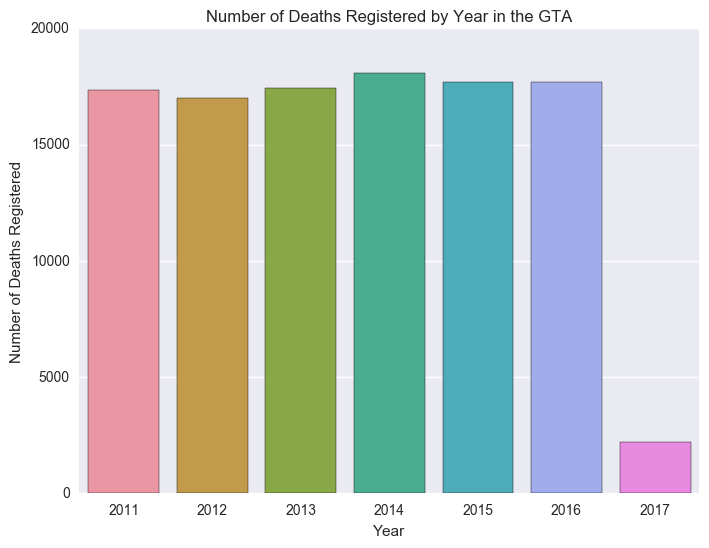

In [10]:
year = df.groupby('YEAR')['DEATH_LICENSES'].sum()
year
yearChart = plt.figure(figsize=(8,6))
sns.barplot(x=year.index, y=year.values)
plt.ylabel('Number of Deaths Registered')
plt.xlabel('Year')
plt.title('Number of Deaths Registered by Year in the GTA')

charts.append(yearChart)

### B. Which civic centre has registered the most deaths in the dataset?

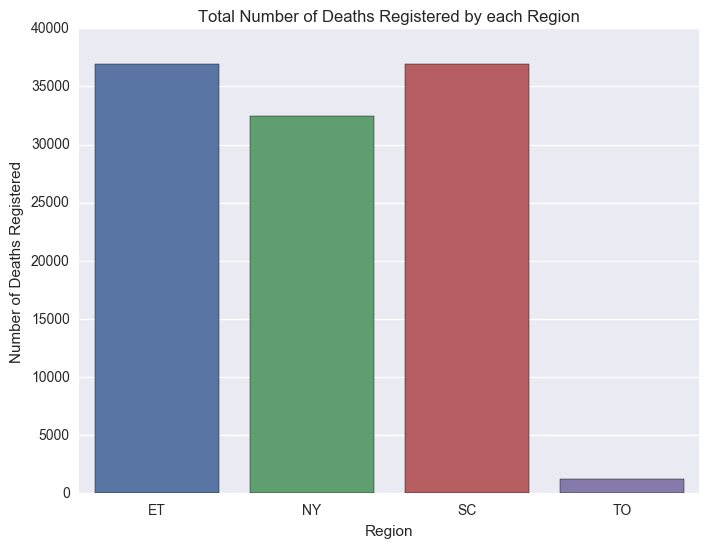

In [11]:
regions = df.groupby(df['CIVIC_CENTRE']).sum()
regions.drop(['YEAR', 'MONTH'], axis=1, inplace=True)

totalCivicChart = plt.figure(figsize=(8,6))
sns.barplot(x=regions.index, y=regions.DEATH_LICENSES)
plt.ylabel('Number of Deaths Registered')
plt.xlabel('Region')
plt.title('Total Number of Deaths Registered by each Region')

charts.append(totalCivicChart)

### C. How many death registrations has their been each year, and in total?

In [12]:
deaths_each_year = df.DEATH_LICENSES.groupby(df['YEAR']).sum()
print deaths_each_year
print '\nTotal Number of Deaths Registered 2011 - 2017: ' + str(deaths_each_year.sum())

YEAR
2011    17330
2012    16999
2013    17440
2014    18100
2015    17674
2016    17700
2017     2202
Name: DEATH_LICENSES, dtype: int64

Total Number of Deaths Registered 2011 - 2017: 107445


### D. Which Civic Centres register the most deaths, and where are the places of death?

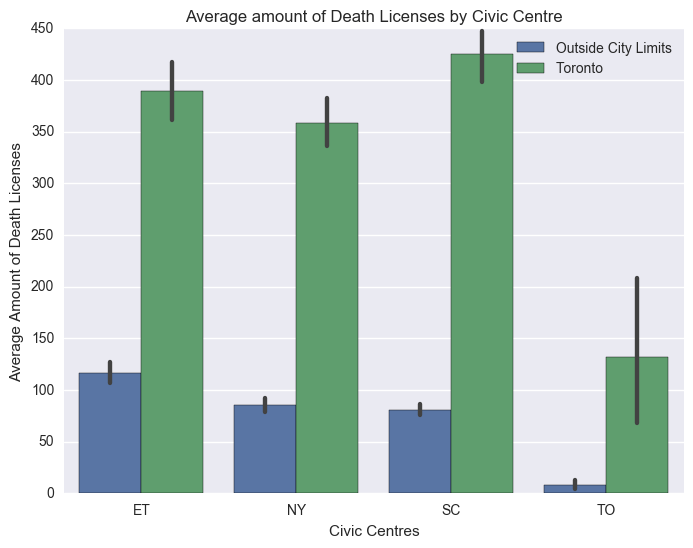

In [13]:
avgCivicChart = plt.figure(figsize=(8,6))
sns.barplot(x=df.CIVIC_CENTRE, y=df.DEATH_LICENSES, hue=df.PLACE_OF_DEATH)
plt.title('Average amount of Death Licenses by Civic Centre')
plt.xlabel('Civic Centres')
plt.ylabel('Average Amount of Death Licenses')
plt.legend()

charts.append(avgCivicChart)

### E. How are the death registrations distributed across months, on average?

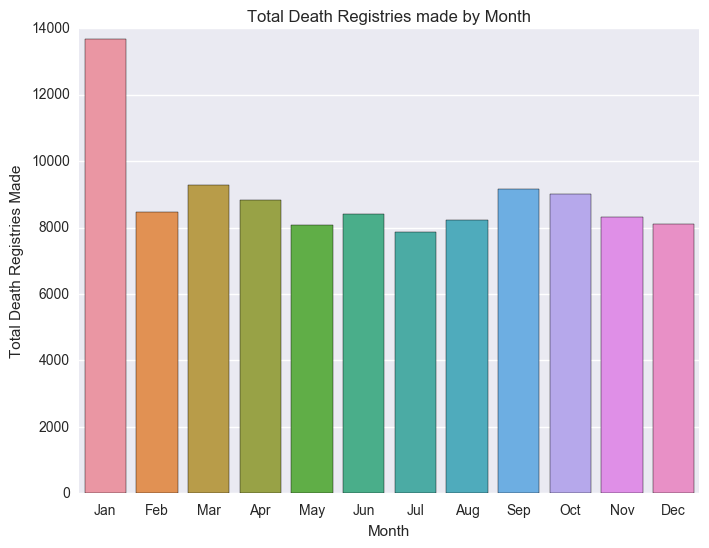

In [14]:
months = df.groupby(['MONTH']).sum()
months.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthChart = plt.figure(figsize=(8,6))
sns.barplot(x=months.index, y=months.DEATH_LICENSES)
plt.title('Total Death Registries made by Month')
plt.xlabel('Month')
plt.ylabel('Total Death Registries Made')

charts.append(monthChart)

## 5. Export Charts as PNGs

In [15]:
import os
folder = 'Toronto Death Registry Charts'
if not os.path.exists(folder):
    os.makedirs(folder)
os.chdir(folder)
count = 0
for x in charts:
    x.savefig(str(count) + '.png')
    count += 1

## 6. Machine Learning

Can we reliably determine CIVIC_CENTRE based on the dataset's other features?

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier

In [17]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
df.head()

,YEAR,MONTH,CIVIC_CENTRE,PLACE_OF_DEATH,DEATH_LICENSES
0,0,0,0,0,36
1,0,0,0,1,173
2,0,0,1,0,95
3,0,0,1,1,259
4,0,0,2,0,87


In [18]:
train, test = train_test_split(df, test_size=0.2)

train_x = train[[x for x in train.columns if 'CIVIC_CENTRE' not in x]]
train_y = train['CIVIC_CENTRE']

test_x = test[[x for x in test.columns if 'CIVIC_CENTRE' not in x]]
test_y = test['CIVIC_CENTRE']

In [19]:
models = [SVC(kernel='rbf', random_state=0),
          SVC(kernel='linear', random_state=0), 
          LogisticRegression(),
          DecisionTreeClassifier(), 
          Perceptron(),
          KNeighborsClassifier()]

model_names = ['SVC RBF', 'SVC Linear', 'Logistic Regression', 'Decision Tree', 'Perceptron', 'K Neighbours']

for i, model in enumerate(models):
    model.fit(train_x, train_y)
    print('The accuracy of ' + model_names[i] + ' is: ' + str(accuracy_score(test_y, model.predict(test_x)))[:5])

The accuracy of SVC RBF is: 0.3
The accuracy of SVC Linear is: 0.244
The accuracy of Logistic Regression is: 0.288
The accuracy of Decision Tree is: 0.344
The accuracy of Perceptron is: 0.255
The accuracy of K Neighbours is: 0.366


Just from implementing these ML models out of the box, it seems like this question would need specific parameter tweaking to get anywhere close a reliable answer. Something to return to once I have a better understanding of ML algorithms.